# How to Build drawing prediction app using CNN less than 10 min. 


## Introduction 
One of the crucial factors in the field of Machine learning is to show of your work. One of the major issue that you might encounter is building a user interface to show off the power of the trained model. To build an eye attractive user interface, you need additional advance skills such as  web development and Dev-ops in addition to time.

In this post, we will build a sketch pad for a trained model to recognize handrawn sketch in a few and easy steps.  


## Pre-requisites
This tutorial assumes that you are comfortable building ANN models in tensorflow and keras. For this tutorial, We will use the trained model from the [AI expremint Github](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/sketch_recognition_mlp/sketch_recognition_mlp.ipynb) repo to build the interface with Gradio. 

Also, if you need a refresher to get started with gradio, you can checkout my previous tutorial on a step-by-step guide on how to set up Gradio account. Additionally, you can check the get started guide on gradio website here. 

In this tutorial, we will use `tensorflow version 1.x` if you would like to use the latest version of `tensorflow 2.x`, you need to retrain the model accordinly. However, the steps should be the same. 


> The notebook associated with this tutorial is hosted on Github here, if you would like to follow along. 


## Installing required libraries
You will need to install gradio using the `pip install gradio` command. 

Then, we need to import gradio as well as trensorflow. After that, we will load the pre-trained model to the colab notebook using `load_model` function within `tf.keras` module. 

Furthermore, we need to fetch the labels associated per each draw; for that, we will import them from the googlecreativelab public repository. 

In [ ]:
!pip install gradio -q
%tensorflow_version 1.x

     |████████████████████████████████| 1.1MB 11.4MB/s 
     |████████████████████████████████| 215kB 46.8MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 3.2MB 52.5MB/s 
     |████████████████████████████████| 962kB 50.6MB/s 
TensorFlow 1.x selected.


In [ ]:
import gradio as gr
import tensorflow as tf
import urllib.request

# mlp_model = tf.keras.models.load_model(
#   "models/sketch_recognition/mlp.h5")
cnn_model = tf.keras.models.load_model(
  "/content/cnn.h5")

labels = urllib.request.urlopen("https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt")
labels = labels.read()
labels = labels.decode('utf-8').split("\n")[:-1]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


The drawing categories stored in a .txt format, we need to decode it into `utf-8` format and convert into a list by splitting on the `\n` char.

> We sliced the last element in the list because it is an empty string resulting from splitting process.

## Declare the predict function
Gradio interface comprises three main components:


1.   Callable function - In our case would be the the `predict_shape()`
2.   Input component - arguments to the callable functions
3.   Output component - The input after applying the callable function.

So, in the next few lines, we define the `predict_shape()` method and passing the drawing as an input image. After that, calling the predict method on the uploaded model to get the predictions. Finally, the `predict_shape()` will return the top three classes labeled by labeled. 



In [ ]:
def predict_shape(img):
  img = tf.math.divide(img, 255)
  preds = cnn_model.predict(img.reshape(-1, 28, 28, 1))[0]
  return {label: float(pred) for label, pred in zip(labels, preds)}



## Define inputs and outputs components

Gradio has a wide variety of components that you can choose to fullfill your application needs - checkout the full library components [here](https://www.gradio.app/docs#i_image). 
For this application, we will use the Image component and will set the source to 'canvas' to get an sketchpad interface. Also, we will set the size of the canvas to a 28 by 28 pixel. 

We will pick the Label as an output component, and will show only the highest 2 classes out of the predictions. 

In [ ]:
output = gr.outputs.Label(num_top_classes=2)
input = gr.inputs.Image(image_mode='L', 
                        source='canvas', 
                        shape=(28, 28), 
                        invert_colors=True, 
                        tool= 'select')

## Setting up the interface 

The final step to render the previously prepared components is through the interface function. All you need to do is passing the callable function, inputs, and outputs to the `Interface()` then invoke the `launch` to render the application. 

A nice feature within Gradio that you can add HTML markup elements to the rendered interface, so it can function as a standalone web application. In the Interface method, I passed a title and a description for the rendered application. 

> If you are working on google colab, you need to set the debug to True inside the `launch()` method to render inside the colab. 

In [ ]:
title="Sketch prediction app"
description="A Convolution Neural Network model trained on Google's QuickDraw dataset." \
            " Start by draw a smily face, or anything you can think of!"

> Please note: According to documentation, you need to set the capture_session flag to True as the model was originally trained using tensorflow 1.x. 

In [ ]:

gr.Interface(fn = predict_shape,
             inputs = input, 
             outputs = output, 
             live = True, 
             title=title,
             description = description,
             capture_session=True).launch(debug=True)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://30342.gradio.app
Interface loading below...


Awesome! We now have a nice interface. 

## Deploy the interface to get a persistant link 

In a previous post, I walked you through how Gradio build the entire life cycle of the backend of your application using Flask and Docker. 

Till this step, you have a sharable link working for 24 hours, if you want to persist the link, you need to host the application to the [Gradio Host](https://www.gradio.app/introducing-hosted), where you can upload the interface and get a permenant link. 

The steps are straightforward, all you need are:

1.   Github project repo, should include the requirements.txt file
2. Gradio account (same email as GitHub)

And that's it! 



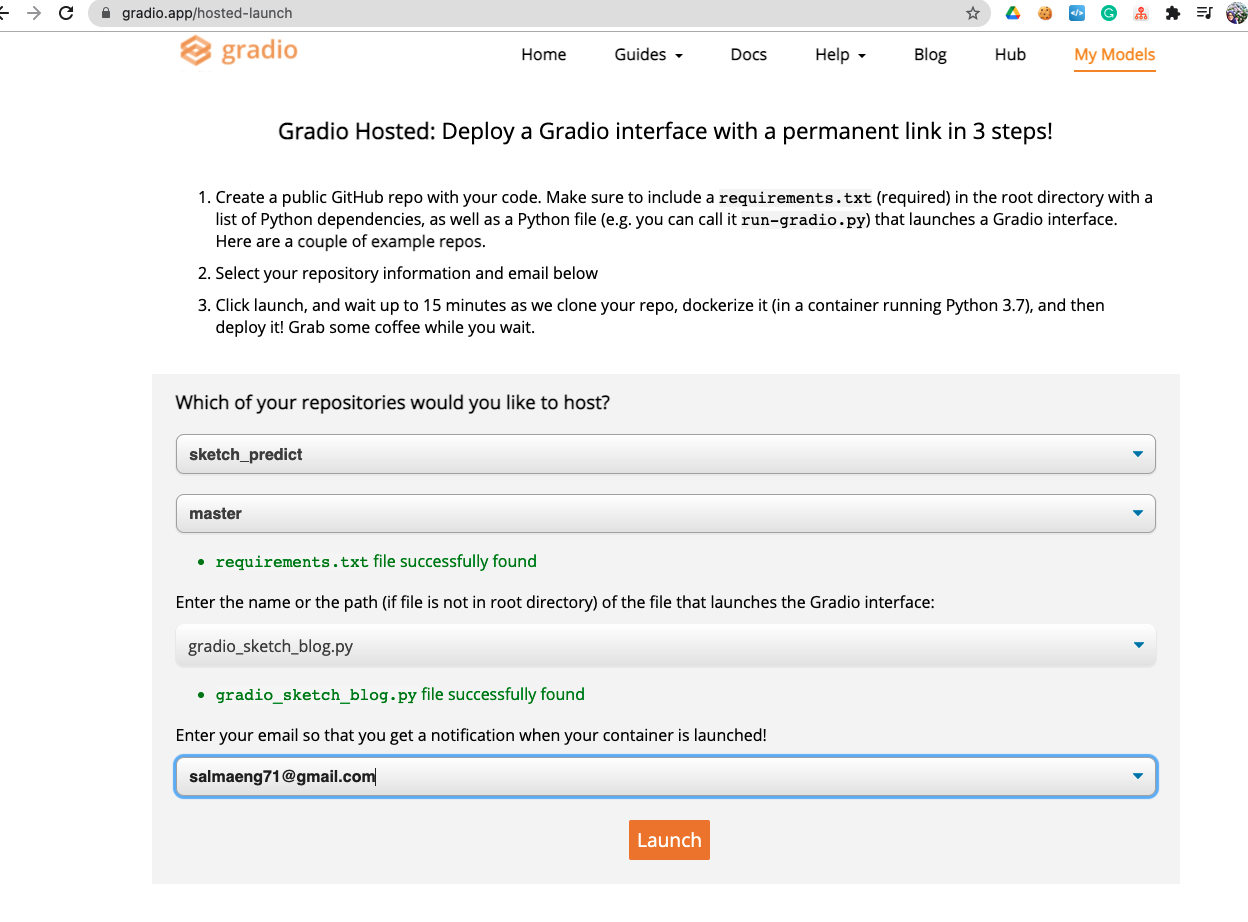

The interface may take several minutes to build the image backend requirements. 

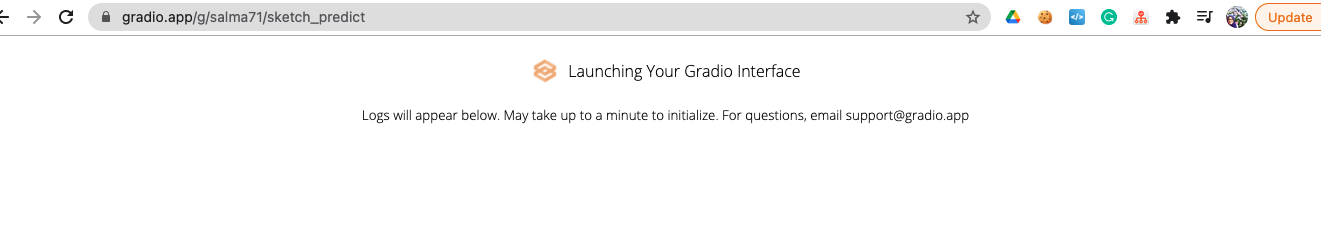

The deeployed interface can then found at the deployed link. You may receive a confirmation email that the interface was successfully deployed. 